In [ ]:

# A Python3 program to find if 2 given line segments intersect or not
  
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
  
# Given three collinear points p, q, r, the function checks if 
# point q lies on line segment 'pr' 
def onSegment(p, q, r):
    if ( (q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and 
           (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))):
        return True
    return False
  
def orientation(p, q, r):
    # to find the orientation of an ordered triplet (p,q,r)
    # function returns the following values:
    # 0 : Collinear points
    # 1 : Clockwise points
    # 2 : Counterclockwise
      
    # See https://www.geeksforgeeks.org/orientation-3-ordered-points/amp/ 
    # for details of below formula. 
      
    val = (float(q.y - p.y) * (r.x - q.x)) - (float(q.x - p.x) * (r.y - q.y))
    if (val > 0):
          
        # Clockwise orientation
        return 1
    elif (val < 0):
          
        # Counterclockwise orientation
        return 2
    else:
          
        # Collinear orientation
        return 0
  
# The main function that returns true if 
# the line segment 'p1q1' and 'p2q2' intersect.
def doIntersect(p1,q1,p2,q2):
      
    # Find the 4 orientations required for 
    # the general and special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
  
    # General case
    if ((o1 != o2) and (o3 != o4)):
        return True
  
    # Special Cases
  
    # p1 , q1 and p2 are collinear and p2 lies on segment p1q1
    if ((o1 == 0) and onSegment(p1, p2, q1)):
        return True
  
    # p1 , q1 and q2 are collinear and q2 lies on segment p1q1
    if ((o2 == 0) and onSegment(p1, q2, q1)):
        return True
  
    # p2 , q2 and p1 are collinear and p1 lies on segment p2q2
    if ((o3 == 0) and onSegment(p2, p1, q2)):
        return True
  
    # p2 , q2 and q1 are collinear and q1 lies on segment p2q2
    if ((o4 == 0) and onSegment(p2, q1, q2)):
        return True
  
    # If none of the cases
    return False
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/MyDrive/Cable Training Data/result_old_new_weights.zip"

wire_predicted_poles_old_weights_full_res/149 Bunkers Hill - Google Maps and 2 more pages - Person 1 - Microsoftâ€‹ Edge 10-02-2023 15_02_31.tiff.jpeg:  mismatching "local" filename (wire_predicted_poles_old_weights_full_res/149 Bunkers Hill - Google Maps and 2 more pages - Person 1 - Microsoft├втВмтА╣ Edge 10-02-2023 15_02_31.tiff.jpeg),
         continuing with "central" filename version
wire_predicted_poles_old_weights_full_res/159 Bunkers Hill - Google Maps and 2 more pages - Person 1 - Microsoftâ€‹ Edge 10-02-2023 15_00_19.tiff.jpeg:  mismatching "local" filename (wire_predicted_poles_old_weights_full_res/159 Bunkers Hill - Google Maps and 2 more pages - Person 1 - Microsoft├втВмтА╣ Edge 10-02-2023 15_00_19.tiff.jpeg),
         continuing with "central" filename version
wire_predicted_ploes_old_weights/149 Bunkers Hill - Google Maps and 2 more pages - Person 1 - Microsoftâ€‹ Edge 10-02-2023 15_02_31.tiff.jpeg:  mismatching "local" filename (wire_predicted_ploes_old_weights/149 Bun

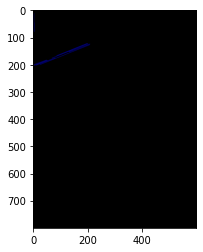

In [ ]:
# -*- coding: utf-8 -*-
"""cable_correction.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1dCpSyPnr3mOi8u8HxXmccu0oy3JX5nYN
"""

import cv2
import numpy as np

import matplotlib.pyplot as plt

im = cv2.imread('/content/wire_predicted_poles_new_weight/149 Bunkers Hill - Google Maps - Google Chrome 17-02-2023 16_44_07.tiff.jpeg')
plt.imshow(im)

im.shape[:-1]

height,width = im.shape[:-1]

skel = np.zeros([height, width], dtype=np.uint8)
test = skel.copy()

edges = cv2.Canny(im, 50, 150)
lsd = cv2.createLineSegmentDetector(0)
lines = lsd.detect(edges)[0]
lines = lines[:, 0]
drawn_img = lsd.drawSegments(skel,lines)
plt.imshow(drawn_img)

line_t = []
for line in lines:
    dx = line[2] - line[0]
    dy = line[3] - line[1]
    # print(dy)
    length = np.sqrt(dx * dx + dy * dy)
    # print('length: ',length)
    if(length>50):
        line_t.append(line)
line_t = np.array(line_t)
test_img = lsd.drawSegments(test,line_t)
plt.imshow(test_img)



In [ ]:
k = []
for line in line_t:
    p1,p2 = (line[:-2],line[2:])
    m = (p2[1]-p1[1])/(p2[0]-p1[0])
    k.append([m,p1[0],p1[1],p2[0],p2[1]])
print(k)

[[-0.40545467, 198.03113, 121.643486, 86.38307, 166.91171], [-0.4021587, 69.14042, 176.29169, 201.36832, 123.11508], [-0.3721849, 48.882687, 183.05223, 0.34321445, 201.11789], [-0.38019177, 208.05905, 124.201546, 131.88866, 153.1609], [-0.40130484, 24.528524, 199.75757, 206.77339, 126.62182], [-0.37842575, 2.9820726, 202.74731, 51.831955, 184.26126], [-0.3928199, 80.79907, 174.81815, 10.798189, 202.31589], [87.5851, 4.0104647, 79.36489, 3.2254531, 10.609581], [659.22296, 1.4059922, 16.873816, 1.4989043, 78.12367]]


In [ ]:
#Getting the slopes and the number of lines which have that slope

p_l = []
for i in range(len(k)):
    pointer = 0
    m = k[i][0]
    for j in range(i+1,len(k)):
        if(abs(k[j][0]-m)<0.009):
            print(m,k[j][0])
            pointer = pointer + 1
    p_l.append([k[i][0],pointer])
print(p_l)

-0.40545467 -0.4021587
-0.40545467 -0.40130484
-0.4021587 -0.40130484
-0.3721849 -0.38019177
-0.3721849 -0.37842575
-0.38019177 -0.37842575
-0.40130484 -0.3928199
[[-0.40545467, 2], [-0.4021587, 1], [-0.3721849, 2], [-0.38019177, 1], [-0.40130484, 1], [-0.37842575, 0], [-0.3928199, 0], [87.5851, 0], [659.22296, 0]]


In [ ]:
#Getting the whole line equation for the lines which have similar slopes

p = []
check = []
for i in range(len(k)):
  for j in range(i+1,len(k)):
      if(abs(k[i][0]-k[j][0])<=0.009):
          print(k[i],k[j])
          p.append([(k[i][1]-k[i][3]),(k[i][2]-k[i][4]),(k[i][1]+k[j][1])/2,(k[i][2]+k[j][2])/2,(k[i][3]+k[j][3])/2,(k[i][4]+k[j][4])/2,k[i][0]])
            
print(p)

[-0.40545467, 198.03113, 121.643486, 86.38307, 166.91171] [-0.4021587, 69.14042, 176.29169, 201.36832, 123.11508]
[-0.40545467, 198.03113, 121.643486, 86.38307, 166.91171] [-0.40130484, 24.528524, 199.75757, 206.77339, 126.62182]
[-0.4021587, 69.14042, 176.29169, 201.36832, 123.11508] [-0.40130484, 24.528524, 199.75757, 206.77339, 126.62182]
[-0.3721849, 48.882687, 183.05223, 0.34321445, 201.11789] [-0.38019177, 208.05905, 124.201546, 131.88866, 153.1609]
[-0.3721849, 48.882687, 183.05223, 0.34321445, 201.11789] [-0.37842575, 2.9820726, 202.74731, 51.831955, 184.26126]
[-0.38019177, 208.05905, 124.201546, 131.88866, 153.1609] [-0.37842575, 2.9820726, 202.74731, 51.831955, 184.26126]
[-0.40130484, 24.528524, 199.75757, 206.77339, 126.62182] [-0.3928199, 80.79907, 174.81815, 10.798189, 202.31589]
[[111.648056, -45.268227, 133.5857696533203, 148.96759033203125, 143.87570190429688, 145.01339721679688, -0.40545467], [111.648056, -45.268227, 111.27982330322266, 160.70053100585938, 146.578231

In [ ]:
p = np.array(p)

In [ ]:
(p)

array([[ 111.64805603,  -45.26822662,  133.58576965,  148.96759033,
         143.8757019 ,  145.01339722,   -0.40545467],
       [ 111.64805603,  -45.26822662,  111.2798233 ,  160.70053101,
         146.57823181,  146.76676941,   -0.40545467],
       [-132.22790527,   53.17660522,   46.83447266,  188.02462769,
         204.07086182,  124.86845398,   -0.40215871],
       [  48.53947067,  -18.06565857,  128.47087097,  153.62689209,
          66.11593628,  177.1394043 ,   -0.3721849 ],
       [  48.53947067,  -18.06565857,   25.93237877,  192.89978027,
          26.08758545,  192.6895752 ,   -0.3721849 ],
       [  76.1703949 ,  -28.95935822,  105.52056122,  163.47442627,
          91.86030579,  168.71109009,   -0.38019177],
       [-182.24487305,   73.13574982,   52.66379929,  187.28785706,
         108.78578949,  164.46885681,   -0.40130484]])

In [ ]:
#Line Extension

def extend_line(op1,op2,p1, p2, distance=300):

    diff = np.arctan2(op2,op1)
    p3_x = int(p1[0] + distance*np.cos(diff))
    p3_y = int(p1[1] + distance*np.sin(diff))
    p4_x = int(p1[0] - distance*np.cos(diff))
    p4_y = int(p1[1] - distance*np.sin(diff))
    return ((p3_x, p3_y), (p4_x, p4_y))
def slope(p1,p2):
  return (p2[1]-p1[1])/(p2[0]-p1[0])

Yes


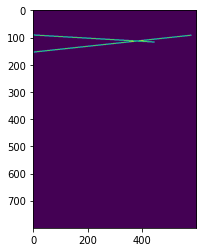

In [ ]:
p1 = [-196.23233032,  -11.55019379,  144.31420898,   99.72168732,
         131.81178284,   98.5201416 ]
p2 = [ -76.71110535,    8.17134857,  280.00366211,  124.3765564 ,
         280.22744751,  124.60595703]
test2 = np.zeros([height, width], dtype=np.uint8)
ep1,ep2 = extend_line(p1[0],p1[1],(p1[2],p1[3]),(p1[4],p1[5]))
final2 = cv2.line(test2, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
ep1,ep2 = extend_line(p2[0],p2[1],(p2[2],p2[3]),(p2[4],p2[5]))
final2 = cv2.line(final2, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
plt.imshow(final2)
pe1 = extend_line(p1[0],p1[1],(p1[2],p1[3]),(p1[4],p1[5]))
pe2 = extend_line(p2[0],p2[1],(p2[2],p2[3]),(p2[4],p2[5]))
x1 = Point(pe1[0][0],pe1[0][1])
x2 = Point(pe1[1][0],pe1[1][1])
x3 = Point(pe2[0][0],pe2[0][1])
x4 = Point(pe2[1][0],pe2[1][1])
if(doIntersect(x1,x2,x3,x4)):
  print('Yes')

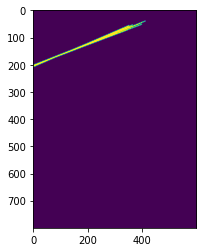

In [ ]:
l =[]
test2 = np.zeros([height, width], dtype=np.uint8)
for i in range(len(p)):
  # print('point:',p[i])
  for j in range(i+1,(len(p)-1)):
    # print(p[j])
    pe1 = extend_line(p[i][0],p[i][1],(p[i][2],p[i][3]),(p[i][4],p[i][5]))
    pe2 = extend_line(p[j][0],p[j][1],(p[j][2],p[j][3]),(p[j][4],p[j][5]))
    x1 = Point(pe1[0][0],pe1[0][1])
    x2 = Point(pe1[1][0],pe1[1][1])
    x3 = Point(pe2[0][0],pe2[0][1])
    x4 = Point(pe2[1][0],pe2[1][1]) 
    # print('for points : ',p[i],p[j])
    # print('slope:',abs(p[i][6]-p[j][6]))
    if(doIntersect(x1,x2,x3,x4) and abs(p[i][6]-p[j][6])<0.1) :
      # print('Yes')
      # print(p[i],p[j])
      l.append(p[i])
      l.append(p[j])
      point = (p[i]+p[j])/2 
      ep1,ep2 = extend_line(point[0],point[1],(point[2],point[3]),(point[4],point[5]))
      finalf = cv2.line(test2, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
    # else:
    #   point = p[i]
    #   ep1,ep2 = extend_line(point[0],point[1],(point[2],point[3]),(point[4],point[5]))
    #   finalf = cv2.line(finalf, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
    
      # point2 = p[j] 
      # ep1,ep2 = extend_line(point[0],point[1],(point[2],point[3]),(point[4],point[5]))
      # finalf = cv2.line(finali, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)

plt.imshow(finalf)

In [ ]:
l

[array([111.64805603, -45.26822662, 133.58576965, 148.96759033,
        143.8757019 , 145.01339722,  -0.40545467]),
 array([ 48.53947067, -18.06565857, 128.47087097, 153.62689209,
         66.11593628, 177.1394043 ,  -0.3721849 ]),
 array([111.64805603, -45.26822662, 133.58576965, 148.96759033,
        143.8757019 , 145.01339722,  -0.40545467]),
 array([ 48.53947067, -18.06565857,  25.93237877, 192.89978027,
         26.08758545, 192.6895752 ,  -0.3721849 ]),
 array([111.64805603, -45.26822662, 133.58576965, 148.96759033,
        143.8757019 , 145.01339722,  -0.40545467]),
 array([ 76.1703949 , -28.95935822, 105.52056122, 163.47442627,
         91.86030579, 168.71109009,  -0.38019177]),
 array([111.64805603, -45.26822662, 111.2798233 , 160.70053101,
        146.57823181, 146.76676941,  -0.40545467]),
 array([-132.22790527,   53.17660522,   46.83447266,  188.02462769,
         204.07086182,  124.86845398,   -0.40215871]),
 array([111.64805603, -45.26822662, 111.2798233 , 160.70053101,
 

In [ ]:
nun = []

for i in p:
  k = 1
  for j in l:
    if((np.array_equal(i,j))):
      k = 0
  if(k!=0):
    nun.append(i)

In [ ]:
nun

[array([-182.24487305,   73.13574982,   52.66379929,  187.28785706,
         108.78578949,  164.46885681,   -0.40130484])]

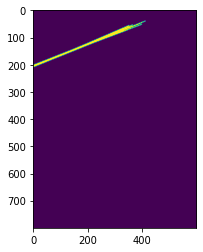

In [ ]:
for point in nun:
  ep1,ep2 = extend_line(point[0],point[1],(point[2],point[3]),(point[4],point[5]))
  final2 = cv2.line(finalf, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
plt.imshow(final2)

#Everything as a function


In [ ]:
from google.colab.patches import cv2_imshow
import os

def extend_line(op1,op2,p1, p2, distance=300):
    diff = np.arctan2(op2,op1)
    p3_x = int(p1[0] + distance*np.cos(diff))
    p3_y = int(p1[1] + distance*np.sin(diff))
    p4_x = int(p1[0] - distance*np.cos(diff))
    p4_y = int(p1[1] - distance*np.sin(diff))
    return ((p3_x, p3_y), (p4_x, p4_y))

def slope(p1,p2):
  return (p2[1]-p1[1])/(p2[0]-p1[0])


def get_lines(im_path,save_path,filename):
  im = cv2.imread(im_path)

  im.shape[:-1]

  height,width = im.shape[:-1]

  skel = np.zeros([height, width], dtype=np.uint8)
  test = skel.copy()

  edges = cv2.Canny(im, 50, 150)
  lsd = cv2.createLineSegmentDetector(0)
  lines = lsd.detect(edges)[0]
  lines = lines[:, 0]
  drawn_img = lsd.drawSegments(skel,lines)

  line_t = []
  for line in lines:
      dx = line[2] - line[0]
      dy = line[3] - line[1]
      # print(dy)
      length = np.sqrt(dx * dx + dy * dy)
      # print('length: ',length)
      if(length>70):
          line_t.append(line)
  line_t = np.array(line_t)
  test_img = lsd.drawSegments(test,line_t)
  # cv2_imshow(test_img)
  cv2.imwrite(os.path.join(save_path,filename + '_line.jpg'),test_img)
  k = []
  for line in line_t:
      p1,p2 = (line[:-2],line[2:])
      m = (p2[1]-p1[1])/(p2[0]-p1[0])
      k.append([m,p1[0],p1[1],p2[0],p2[1]])
  #print(k)

  p_l = []
  for i in range(len(k)):
      pointer = 0
      m = k[i][0]
      for j in range(i+1,len(k)):
          if(abs(k[j][0]-m)<0.009):
              #print(m,k[j][0])
              pointer = pointer + 1
      p_l.append([k[i][0],pointer])
  #print(p_l)

  p = []
  check = []
  for i in range(len(k)):
    for j in range(i+1,len(k)):
        if(abs(k[i][0]-k[j][0])<=0.009):
            #print(k[i],k[j])
            p.append([(k[i][1]-k[i][3]),(k[i][2]-k[i][4]),(k[i][1]+k[j][1])/2,(k[i][2]+k[j][2])/2,(k[i][3]+k[j][3])/2,(k[i][4]+k[j][4])/2,k[i][0]])
              
  #print(p)

  p = np.array(p)

  l =[]
  test2 = np.zeros([height, width], dtype=np.uint8)
  for i in range(len(p)):
    # print('point:',p[i])
    for j in range(i+1,(len(p)-1)):
      # print(p[j])
      pe1 = extend_line(p[i][0],p[i][1],(p[i][2],p[i][3]),(p[i][4],p[i][5]))
      pe2 = extend_line(p[j][0],p[j][1],(p[j][2],p[j][3]),(p[j][4],p[j][5]))
      x1 = Point(pe1[0][0],pe1[0][1])
      x2 = Point(pe1[1][0],pe1[1][1])
      x3 = Point(pe2[0][0],pe2[0][1])
      x4 = Point(pe2[1][0],pe2[1][1]) 
      # print('for points : ',p[i],p[j])
      # print('slope:',abs(p[i][6]-p[j][6]))
      if(doIntersect(x1,x2,x3,x4) and abs(p[i][6]-p[j][6])<0.1) :
        # print('Yes')
        # print(p[i],p[j])
        l.append(p[i])
        l.append(p[j])
        point = (p[i]+p[j])/2 
        ep1,ep2 = extend_line(point[0],point[1],(point[2],point[3]),(point[4],point[5]))
        finalf = cv2.line(test2, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
      # else:
      #   point = p[i]
      #   ep1,ep2 = extend_line(point[0],point[1],(point[2],point[3]),(point[4],point[5]))
      #   finalf = cv2.line(finalf, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
      
        # point2 = p[j] 
        # ep1,ep2 = extend_line(point[0],point[1],(point[2],point[3]),(point[4],point[5]))
        # finalf = cv2.line(finali, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
  nun = []
  for i in p:
    k = 1
    for j in l:
      if((np.array_equal(i,j))):
        k = 0
    if(k!=0):
      nun.append(i)

  for point in nun:
    ep1,ep2 = extend_line(point[0],point[1],(point[2],point[3]),(point[4],point[5]))
    if 'finalf' in vars():
      final2 = cv2.line(finalf, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
    else:
      final2 = cv2.line(test, (int(ep1[0]),int(ep1[1])),(int(ep2[0]),int(ep2[1])),(255,0,0), 2)
  cv2.imwrite(os.path.join(save_path,filename + '_mask.jpg'),final2)
  

In [ ]:
get_lines('/content/wire_predicted_ploes_old_weights/149 Bunkers Hill - Google Maps - Google Chrome 17-02-2023 16_44_30.tiff.jpeg','./','1')

UnboundLocalError: ignored

In [ ]:
#Go through the folders

folder_list = ['/content/wire_predicted_ploes_old_weights','/content/wire_predicted_poles_new_weight','/content/wire_predicted_poles_new_weights_full_res','/content/wire_predicted_poles_old_weights_full_res']

for folder in folder_list:
  for file in os.listdir(folder):
    save_path = folder + '_output'
    file_path = os.path.join(folder,file)
    if not os.path.exists(save_path):
      os.mkdir(save_path)
    print(file_path)
    filename = file.split('.')[0]
    get_lines(file_path,save_path,filename)

/content/wire_predicted_ploes_old_weights/149 Bunkers Hill - Google Maps - Google Chrome 17-02-2023 16_45_55 (2).tiff.jpeg
/content/wire_predicted_ploes_old_weights/149 Bunkers Hill - Google Maps - Google Chrome 17-02-2023 16_44_30 (2).tiff.jpeg
/content/wire_predicted_ploes_old_weights/91 Bunkers Hill - Google Maps - Google Chrome 17-02-2023 16_47_39.tiff.jpeg
/content/wire_predicted_ploes_old_weights/149 Bunkers Hill - Google Maps - Google Chrome 17-02-2023 16_44_30.tiff.jpeg


UnboundLocalError: ignored